In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfx = pd.read_csv('/content/drive/MyDrive/Datasets/LOWESS/Lowless_input.csv')
dfy = pd.read_csv('/content/drive/MyDrive/Datasets/LOWESS/Lowless_output.csv')

In [4]:
X = dfx.values
Y = dfy.values

In [5]:
print(X.shape, Y.shape)

(99, 1) (99, 1)


In [6]:
u = X.mean()
std = X.std()
X = (X - u)/std

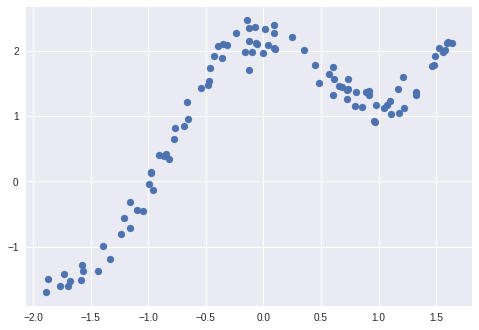

In [7]:
plt.style.use('seaborn')
plt.scatter(X, Y)

In [8]:
def getW(query_point, X, tau):
    m = X.shape[0]

    W = np.mat(np.eye(m))

    for i in range(m):

        W[i, i] = np.exp(np.dot((X[i] - query_point), (X[i] - query_point).T/(-2*tau*tau)))

    return W

In [9]:
X = np.mat(X)
Y = np.mat(Y)

In [10]:
W = getW(-1, X, 1)
print(W, W.shape)

[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]] (99, 99)


In [36]:
def prediction(X, Y, query_x, tau):
    ones = np.ones((X.shape[0], 1))

    X = np.hstack((X, ones))

    qx = np.mat([query_x, 1])

    W = getW(qx, X, tau)

    theta = np.linalg.pinv(X.T*(W*X))*(X.T*(W*Y))
    pred = np.dot(qx, theta)

    # print(theta)
    # print(pred)

    return theta, pred

In [37]:
theta, pred = prediction(X, Y, 1.0, 1.0)

In [38]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [39]:
pred

matrix([[1.59417694]])

In [50]:
def plot_preds(X, Y, tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []

    for i in X_test:
        theta, pred = prediction(X, Y, i, tau)
        Y_test.append(pred[0][0])

    plt.title(f'Tau/Bandwidth for this is: {tau}')
    plt.scatter(np.array(X), np.array(Y))
    plt.scatter(X_test, Y_test, color = 'red')
    plt.show()


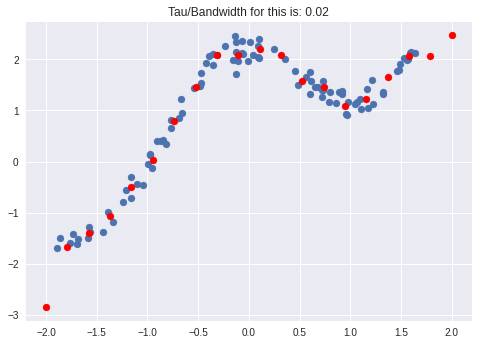

In [51]:
Y_test = plot_preds(X, Y, 0.02)

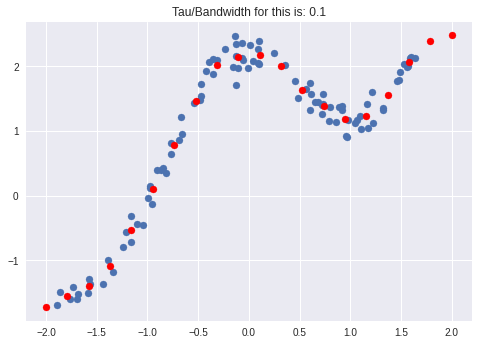

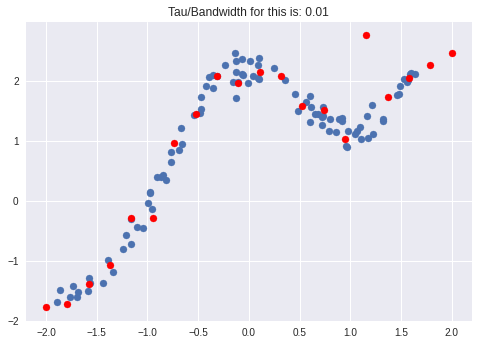

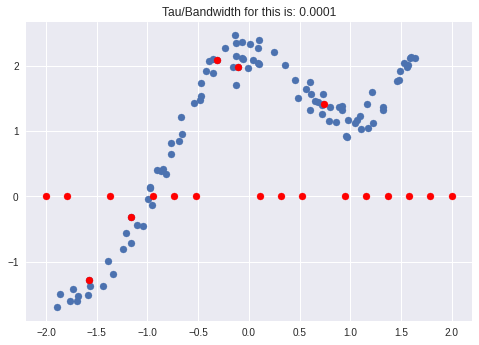

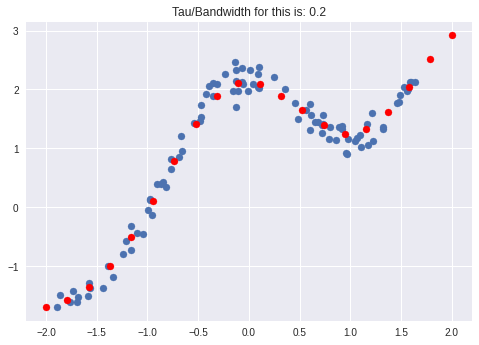

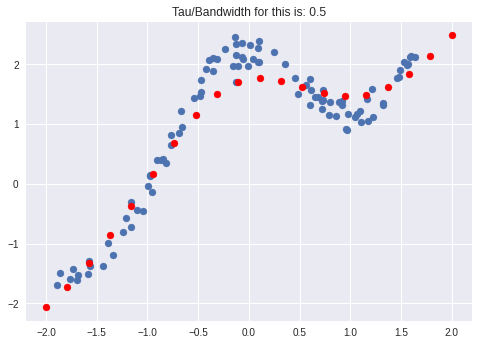

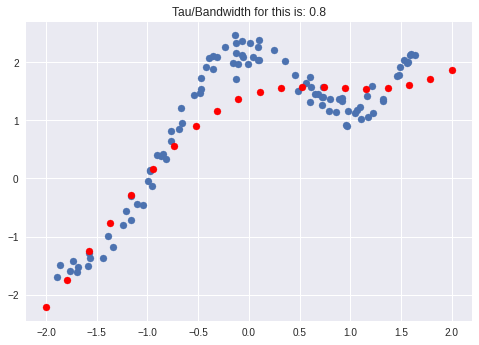

In [52]:
taus = [0.1, 0.01, 0.0001, 0.2, 0.5, 0.8]

for i in taus:
    plot_preds(X, Y, i)